In [12]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=False)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
mnist.train.images.shape

(55000, 784)

In [14]:
X_ = np.vstack((mnist.train.images[(mnist.train.labels == 0)], mnist.train.images[(mnist.train.labels == 1)]))

In [16]:
X = np.ones((X_.shape[0],X_.shape[1]+1))
X[:, 1:] = X_

In [20]:
y = np.asarray(mnist.train.labels[(mnist.train.labels == 0)].tolist() + mnist.train.labels[(mnist.train.labels == 1)].tolist()) 

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [31]:
import sklearn

In [32]:
sklearn.__version__

'0.18.1'

In [41]:
X_train, _,  y_train, _ = train_test_split(X, y, train_size=1000, random_state=42)

In [75]:
np.save("X_train", X_train)
np.save("y_train", y_train)

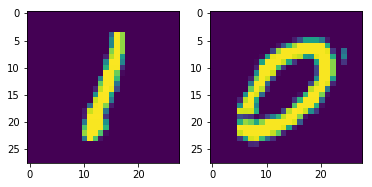

In [80]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(X_train[0][1:].reshape((28, 28)))
axes[1].imshow(X_train[1][1:].reshape((28, 28)))

In [81]:
class LogisticRegression:
    
    def __init__(self, X, y):
        self.X_ = X
        self.y_ = y
        self.w_ = np.zeros(X.shape[1])
    
    def sigmoid_(self, z):
        return 1.0/(1.0 + np.exp(-z))
    
    def gradient_(self):
        Xw =  self.X_.dot(self.w_)
        v_ = self.y_ - self.sigmoid_(Xw)
        return -1.0*self.X_.T.dot(v_)
    
    def gradient_step(self, learning_rate):
        self.w_ -= learning_rate*self.gradient_()
        
    def accuracy(self):
        return accuracy_score(self.y_, (self.sigmoid_(self.X_.dot(self.w_)) > 0.5).astype(int))

In [74]:
model = LogisticRegression(X_train, y_train)
learning_rate = 0.01
print "Initial accuracy:", model.accuracy()
for i in range(100):
    model.gradient_step(learning_rate)
    print "Accuracy after step {}: {}".format(i+1, model.accuracy())

Initial accuracy: 0.451
Accuracy after step 1: 0.986
Accuracy after step 2: 0.989
Accuracy after step 3: 0.989
Accuracy after step 4: 0.989
Accuracy after step 5: 0.989
Accuracy after step 6: 0.992
Accuracy after step 7: 0.992
Accuracy after step 8: 0.992
Accuracy after step 9: 0.992
Accuracy after step 10: 0.992
Accuracy after step 11: 0.992
Accuracy after step 12: 0.993
Accuracy after step 13: 0.993
Accuracy after step 14: 0.993
Accuracy after step 15: 0.993
Accuracy after step 16: 0.993
Accuracy after step 17: 0.993
Accuracy after step 18: 0.993
Accuracy after step 19: 0.993
Accuracy after step 20: 0.993
Accuracy after step 21: 0.993
Accuracy after step 22: 0.993
Accuracy after step 23: 0.994
Accuracy after step 24: 0.995
Accuracy after step 25: 0.996
Accuracy after step 26: 0.997
Accuracy after step 27: 0.997
Accuracy after step 28: 0.998
Accuracy after step 29: 0.998
Accuracy after step 30: 0.998
Accuracy after step 31: 0.998
Accuracy after step 32: 0.998
Accuracy after step 33: 0